In [28]:
import math
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #显示中文
x = 355 / 113 # 得到一个可当精确值的近似值
x1=float('{0:.13f}'.format(x))
print('π的近似值取：{0:.13f}\n'.format(x))
# 求绝对误差，一般取正
e = abs(x - math.pi)  # 定义上的绝对误差
print('e的近似值取：{0:.13f}\n'.format(e))
a = float('{0:.6g}'.format(e)) # 求出绝对误差 保留6位有效数字
print('6位有效数字的e为：{}'.format(a))

π的近似值取：3.1415929203540

e的近似值取：0.0000002667642

6位有效数字的e为：2.66764e-07


求绝对误差限，比误差限大，但要尽可能小\
要考虑科学计数法带来的影响，有三种情况
- 有小数点，也有e
- 有小数点，没有e
- 没有小数点，没有e （整数）

In [29]:
if a >= e:
    epsilon = a
if a < e:
    b = str(a)
    if b.find('e', 1) == -1 and b.find('.') != -1: # 没有e 有小数点
        weishu = len(b) - b.find('.') - 1
    elif b.find('e', 1) != -1: # 有e
        ff = b[b.find('e') + 2:]
        print(float(ff))
        tmp = b.find('e') - b.find('.') - 1
        print(tmp)
        weishu = float(ff) + tmp
        print(weishu)
    elif b.find('e', 1) == -1 and b.find('.') == -1: # 没有小数 没有小数点
        weishu = 0
    epsilon = a + 0.1 ** weishu
print("绝对误差限可取: {0:.13f}\n".format(epsilon))

7.0
5
12.0
绝对误差限可取: 0.0000002667650



计算有效数字位数

In [30]:
tmp = '{0:e}'.format(float(x1)) # 转化为科学计数法
print(tmp)
m = int(tmp[tmp.find('e') + 1:]) # 截取e后面的字符串并转化为int
print(m)
n = math.floor(m + 1 - math.log(2 * e, 10.0)) # 向下取整
print('有效数字位数为：{}'.format(n))

3.141593e+00
0
有效数字位数为：7


计算积分真值，存入realVal列表中

In [31]:
x = sy.symbols('x')
realVal = []
X=[15, 16, 17, 19, 20]
for i in X:
    f = 'x^{}*exp(x-1)'.format(i)
    realVal.append(float(sy.integrate(f, (x, 0, 1))))
print(realVal)

[0.059017540879297774, 0.0557193459312356, 0.05277111916899476, 0.0477227557962091, 0.045544884075818054]


不同的递推方法求积分，并画出积分曲线图
- 正推法
- 倒推法

In [32]:
# 正推法
N = 20
I = np.zeros((3,20)) # 创建3行N列的矩阵
I0 = 1.0 - math.exp(-1)
I[0][0] = 1 - I0
f_real = 'x^1*exp(x-1)'
I[1][0] = float(sy.integrate(f_real,(x,0,1)))
for i in range(1,N): # 注意下标与matlib，从0开始 故 i+1=n
    I[0][i] = 1 - I[0][i-1]*(i+1) #正推法
    f_real = 'x^{}*exp(x-1)'.format(i+1)
    I[1][i] = sy.integrate(f_real,(x,0,1)) # 计算真值

In [33]:
# 逆推法
I_21 = ((math.exp(-1)/(21+1)) + 1/(21+1))*0.5
print(I_21)
I[2][N-1]=(1-I_21)/(N+1)
print(I[2][N-1])
for i in range(N-2,13,-1):
    I[2][i]=(1-I[2][i+1])/(i+2)
I

0.03108816911753278
0.046138658613450824


array([[ 3.67879441e-01,  2.64241118e-01,  2.07276647e-01,
         1.70893412e-01,  1.45532941e-01,  1.26802357e-01,
         1.12383504e-01,  1.00931967e-01,  9.16122930e-02,
         8.38770701e-02,  7.73522294e-02,  7.17732477e-02,
         6.69477800e-02,  6.27310804e-02,  5.90337936e-02,
         5.54593017e-02,  5.71918706e-02, -2.94536708e-02,
         1.55961974e+00, -3.01923949e+01],
       [ 3.67879441e-01,  2.64241118e-01,  2.07276647e-01,
         1.70893412e-01,  1.45532941e-01,  1.26802357e-01,
         1.12383504e-01,  1.00931967e-01,  9.16122930e-02,
         8.38770701e-02,  7.73522289e-02,  7.17732536e-02,
         6.69477026e-02,  6.27321639e-02,  5.90175409e-02,
         5.57193459e-02,  5.27711192e-02,  5.01198550e-02,
         4.77227558e-02,  4.55448841e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

**绘图**\
n=2 n=5 n=8

Text(0.5, 1.0, '积分对应的几何含义图形')

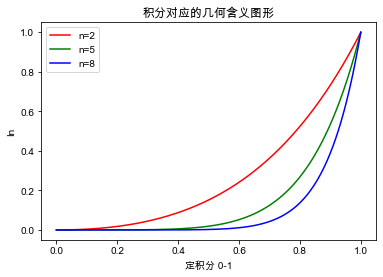

In [34]:
x = np.linspace(0,1,1000) # 0-1间取1000个点
y1 = x**2*np.exp(x-1)
y2 = x**5*np.exp(x-1)
y3 = x**8*np.exp(x-1)
%matplotlib inline
plt.plot(x,y1,color = 'r',label = 'n=2')
plt.plot(x,y2,color = 'g',label = 'n=5')
plt.plot(x,y3,color = 'b',label = 'n=8')
plt.legend()
plt.xlabel('定积分 0-1')
plt.ylabel('In')
plt.title('积分对应的几何含义图形')